In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
import matplotlib as mpl
mpl.rcParams.update({
    'figure.figsize'      : (15,15),
    'font.size'           : 20.0,
    'axes.titlesize'      : 'large',
    'axes.labelsize'      : 'medium',
    'xtick.labelsize'     : 'medium',
    'ytick.labelsize'     : 'medium',
    'legend.fontsize'     : 'large',
    'legend.loc'          : 'upper right'
})

In [5]:
df = pd.read_csv('../data/PIRUS.csv',na_values=['-99'])
# df = pd.read_csv('PIRUS.csv')

In [6]:
df.info()
df.head()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Columns: 145 entries, Subject_ID to Standing
dtypes: float64(112), int64(14), object(19)
memory usage: 2.1+ MB


Subject_ID                             0
Loc_Plot_State1                       26
Loc_Plot_City1                       286
Loc_Plot_State2                     1618
Loc_Plot_City2                      1686
Date_Exposure                          0
Plot_Target1                          33
Plot_Target2                        1636
Plot_Target3                        1781
Attack_Preparation                   198
Op_Security                          405
Changing_Target                      349
Anticp_Fatals_Targ                   225
Internet_Use_Plot                    310
Extent_Plot                           27
Violent                                0
Criminal_Severity                     18
Criminal_Charges                      82
Indict_Arrest                         41
Current_Status                       271
Group_Membership                       0
Terrorist_Group_Name1                 18
Terrorist_Group_Name2               1773
Terrorist_Group_Name3               1852
Actively_Recruit

In [7]:
cols = ['Subject_ID','Current_Status','Clique_Connect','Prison_Radicalize','Diaspora_Ties','Aspirations','Standing']
lst = [df.columns.get_loc(col) for col in cols]
catagories = ['Management and Identification Variables','Plot and Consequences', 'Group Nature', 'Radicalization', \
              'Demographics', 'Socioeconomic Status', 'Personal']
start = 0
for chunk,name in zip(lst,catagories):
    col = df.iloc[:,start:chunk+1].info()
    start = chunk + 1
    print(name,'\n',col,'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 1 columns):
Subject_ID    1865 non-null int64
dtypes: int64(1)
memory usage: 14.6 KB
Management and Identification Variables 
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 19 columns):
Loc_Plot_State1       1839 non-null object
Loc_Plot_City1        1579 non-null object
Loc_Plot_State2       247 non-null object
Loc_Plot_City2        179 non-null object
Date_Exposure         1865 non-null object
Plot_Target1          1832 non-null float64
Plot_Target2          229 non-null float64
Plot_Target3          84 non-null float64
Attack_Preparation    1667 non-null float64
Op_Security           1460 non-null float64
Changing_Target       1516 non-null float64
Anticp_Fatals_Targ    1640 non-null float64
Internet_Use_Plot     1555 non-null float64
Extent_Plot           1838 non-null float64
Violent               1865 non-null int64
Criminal_Severity

In [14]:
print(df.Violent.unique())
print(df.Violent.count())
print(df.Violent.sum())
print(df.Violent.sum()/df.Violent.count()*100)

[1 0]
1865
1100
58.98123324396782


In [9]:
df[df.Gender==1].Gender.count()

182

In [10]:
columns = list(df.loc[:,'Broad_Ethnicity':'Aspirations'].columns)
columns.remove('Age_Child')
df.Language_English.replace({-88:1})
df.Gender.replace({1:0,2:1})
df[['Education_Change','Change_Performance','Work_History','Social_Stratum_Adulthood']].replace(-88,'NaN')
y = df['Violent']
X = df[columns].select_dtypes(exclude='object').fillna(df.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

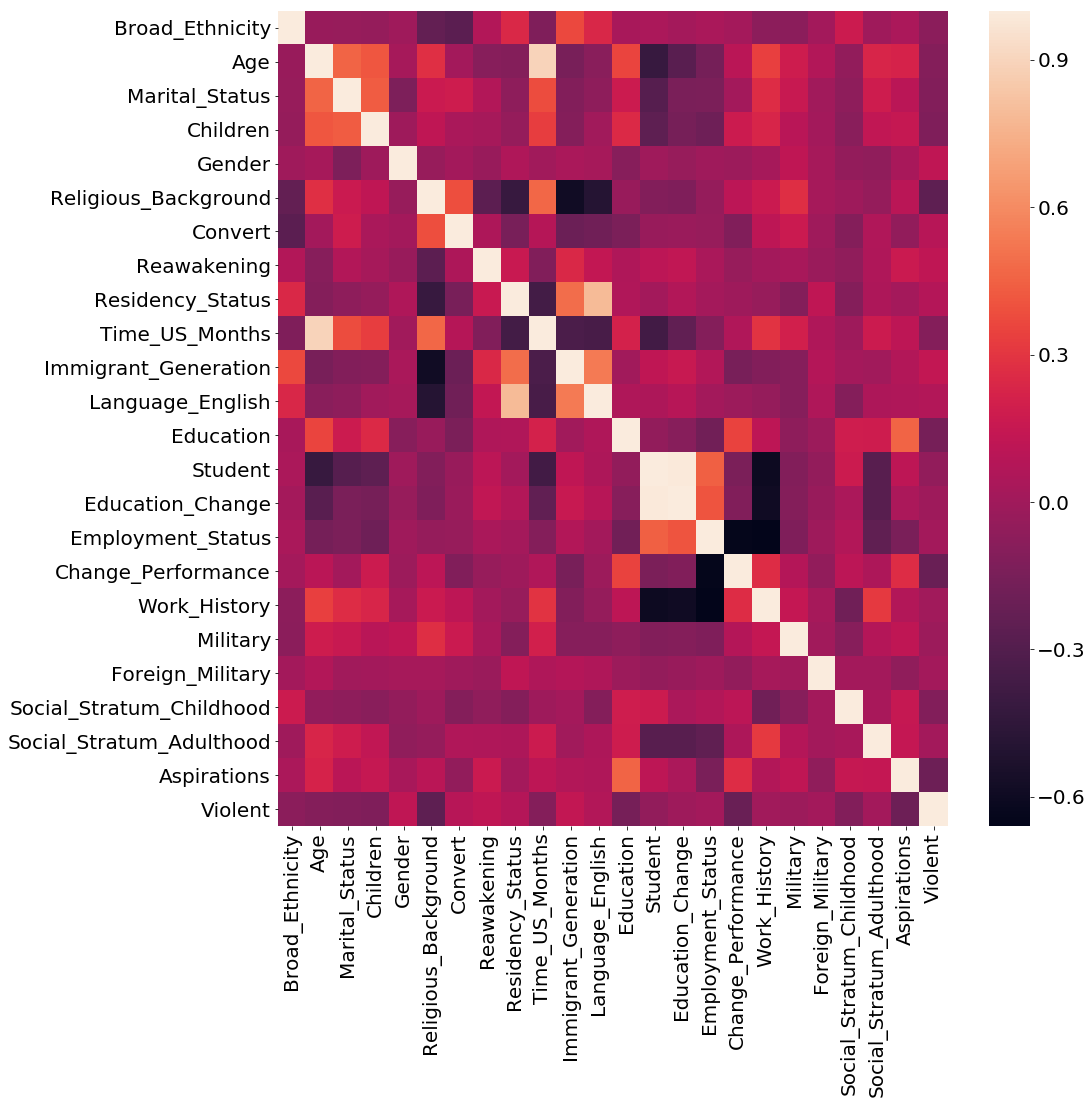

In [11]:
corr = df[columns+['Violent']].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [12]:
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as oi
from statsmodels.stats import diagnostic

linear_model = sm.OLS(y_train, X_train).fit()
print(linear_model.summary2())


for idx, col in enumerate(X.columns):

    print(f"{col}: {oi.variance_inflation_factor(X.values,idx)}")

print(diagnostic.het_goldfeldquandt(linear_model.resid, linear_model.model.exog))

                    Results: Ordinary least squares
Model:                OLS                Adj. R-squared:       0.616    
Dependent Variable:   Violent            AIC:                  2293.2021
Date:                 2018-10-11 22:15   BIC:                  2417.9854
No. Observations:     1678               Log-Likelihood:       -1123.6  
Df Model:             23                 F-statistic:          118.1    
Df Residuals:         1655               Prob (F-statistic):   0.00     
R-squared:            0.621              Scale:                0.22653  
------------------------------------------------------------------------
                          Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------------
Broad_Ethnicity          -0.0523   0.0146 -3.5903 0.0003 -0.0808 -0.0237
Age                      -0.0042   0.0017 -2.3984 0.0166 -0.0076 -0.0008
Marital_Status            0.0004   0.0247  0.0160 0.9872 -0.0481  0.0489